<h1>This is my Titanic data analysis project</h1> 
<p>In this project I will investigate this:</p>
<li>How people is distributed among the classes</li>
<li>Survivor rate by class and gender</li>
<li>Fare price by class</li>
<li>cabin floor survivor rate</li>




In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'titanic_data.csv'
Titanic_df = pd.read_csv(filename)

In [232]:
def familie(name): #get the family name
    
    
    return name[:name.find(",")]

In [233]:
family_name = pd.DataFrame({"Family_name" : Titanic_df["Name"].apply(familie)})

In [234]:
Titanic_df = Titanic_df.join(family_name, how='outer')

<h1>How data looks like</h1>

In [236]:
Titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Nasser


#### Fill Age NAN values with the mean. 

In [196]:
# substituir os vvalores faltantes da idade pela media de idade

Titanic_df["Age"] = Titanic_df["Age"].fillna(Titanic_df["Age"].mean())

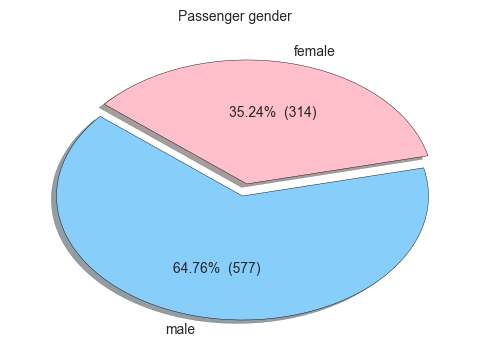

In [197]:
gender_total = Titanic_df['Sex'].value_counts(dropna = False)
total_passengers = gender_total.values.sum()
gender  = gender_total.values
labels = "male","female"

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(gender, labels=labels,autopct = make_autopct(gender), 
        explode=[0, 0.1], colors= ["lightskyblue","pink"], 
        shadow=True, startangle=140)
plt.suptitle("Passenger gender")
plt.show()


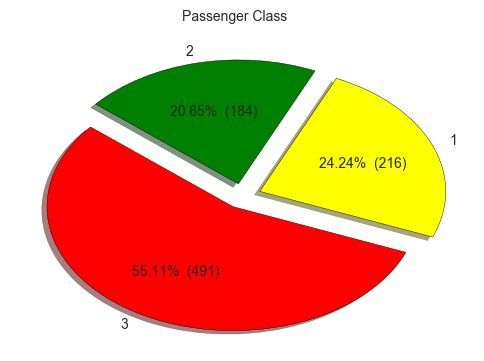

In [198]:
class_total = Titanic_df['Pclass'].value_counts()

plt.pie(class_total, labels = class_total.index, autopct = make_autopct(gender), 
        explode=[0.1, 0.1,0.1], shadow=True, startangle=140, colors= ["red","yellow","green"])
plt.suptitle("Passenger Class")
plt.show()

In [199]:
age_total = Titanic_df['Age'].value_counts()

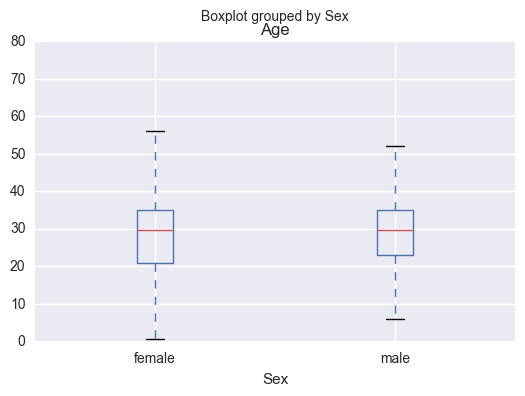

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
Titanic_df.boxplot(column="Age",by="Sex")

<h1>Boxplot gender age class 1</h1>

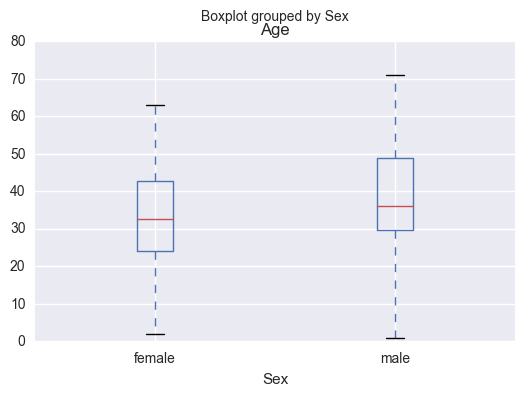

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline
Titanic_df.loc[Titanic_df.Pclass == 1].boxplot(column="Age",by="Sex")

<h1>Boxplot gender age class 2</h1>

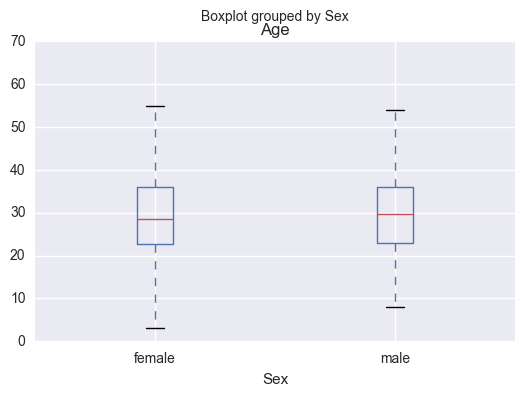

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline
Titanic_df.loc[Titanic_df.Pclass == 2].boxplot(column="Age",by="Sex")

<h1>Boxplot gender age class 3</h1>

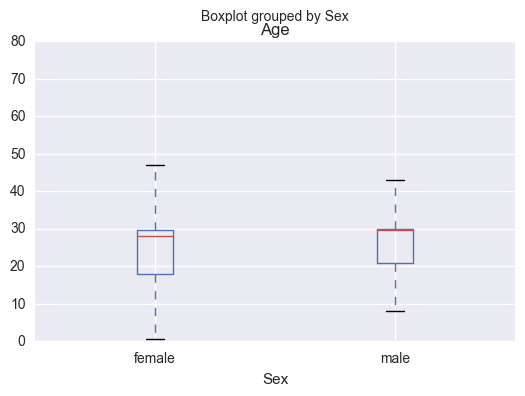

In [203]:
import matplotlib.pyplot as plt
%matplotlib inline
Titanic_df.loc[Titanic_df.Pclass == 3].boxplot(column="Age",by="Sex")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000165C1278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000016844320>], dtype=object)

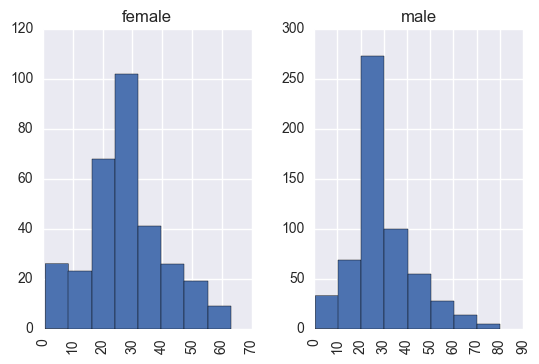

In [204]:
import matplotlib.pyplot as plt
%matplotlib inline

Titanic_df.hist(column="Age",by="Sex",bins=8)


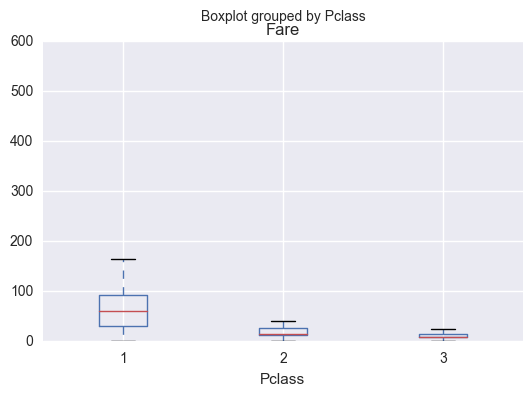

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline
Titanic_df.boxplot(column="Fare",by="Pclass")

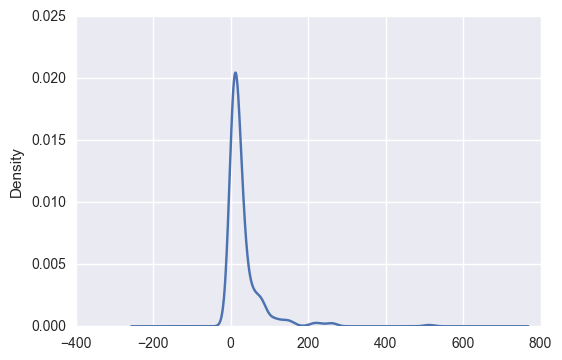

In [206]:
Titanic_df.Fare.plot(kind='density')
plt.show()

<h1>Total fare paid </h1>

In [207]:
Total_paid = Titanic_df.Fare.sum()


In [208]:
print Total_paid

28693.9493


In [209]:
def percConvert(ser):
    return ser/float(ser[-1])

<h1>Charts with diferent data</h1>

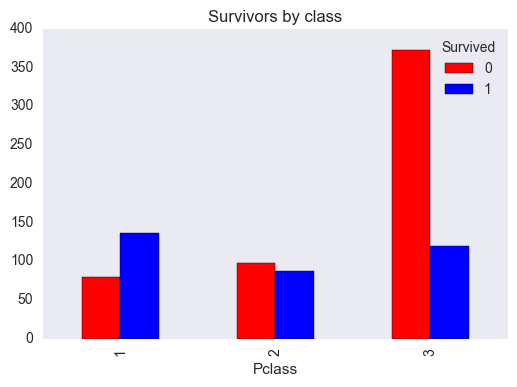

In [210]:
table_survived_pclass = pd.crosstab(Titanic_df.Pclass,
                                    Titanic_df.Survived)

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by class')

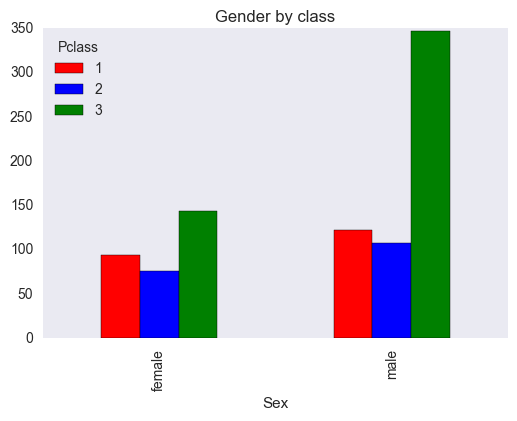

In [211]:
table_survived_pclass = pd.crosstab(Titanic_df.Sex,
                                    Titanic_df.Pclass)

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue',"g"], grid=False, title = 'Gender by class')

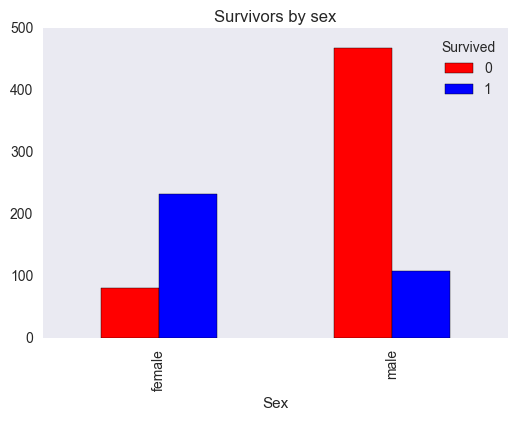

In [212]:
table_survived_pclass = pd.crosstab(Titanic_df.Sex,
                                    Titanic_df.Survived)

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by sex')

In [213]:
def convert_age(ages): # this function divide people by age range;

    
    if ages >= 55:
        ages = "senior age >= 55"
    elif ages >= 30:
        ages = "adult 30 <= age < 55"
    elif ages >= 15:
        ages = "young adult 15 <= age < 30"
    elif ages < 15:
        ages = "kid 0 <= age < 15"
        
    return ages

In [214]:
age_range = Titanic_df["Age"].apply(convert_age)

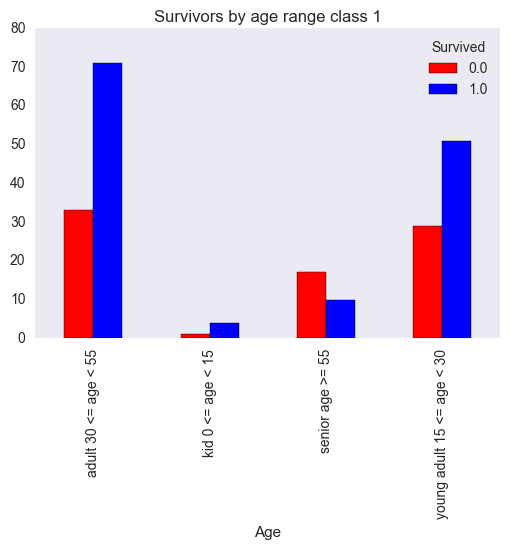

In [215]:
table_survived_pclass = pd.crosstab(age_range,
                                    Titanic_df.Survived.loc[Titanic_df.Pclass == 1])

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by age range class 1')


<h1>If you were under 15 years old and Pclass 2 you were ok!</h1>

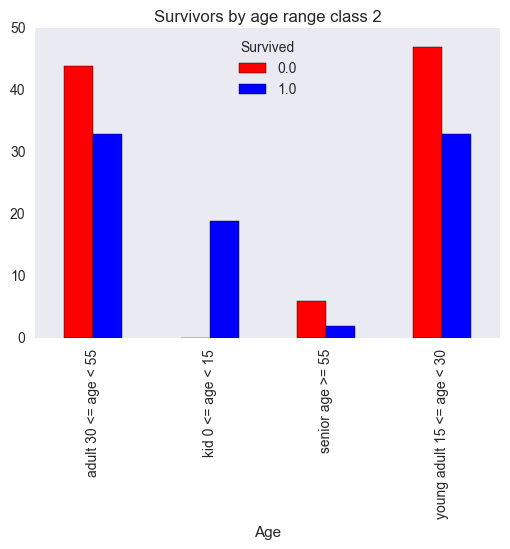

In [216]:
table_survived_pclass = pd.crosstab(age_range,
                                    Titanic_df.Survived.loc[Titanic_df.Pclass == 2])

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by age range class 2')


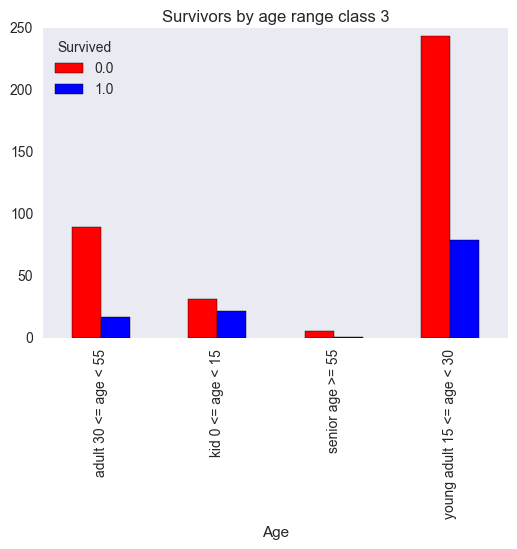

In [217]:
table_survived_pclass = pd.crosstab(age_range,
                                    Titanic_df.Survived.loc[Titanic_df.Pclass == 3])

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by age range class 3')


<h1>Most of the people in class 3 died</h1>

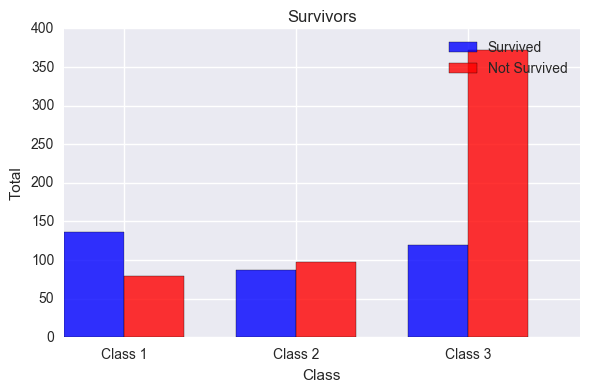

In [218]:
# data to plot
n_groups = 3
Survived_total = (Titanic_df.Survived.loc[(Titanic_df.Pclass == 1)
                              &(Titanic_df.Survived == 1)].value_counts().values,
               Titanic_df.Survived.loc[(Titanic_df.Pclass == 2)
                              &(Titanic_df.Survived == 1)].value_counts().values,
               Titanic_df.Survived.loc[(Titanic_df.Pclass == 3)
                              &(Titanic_df.Survived == 1)].value_counts().values)

Not_Survived_total = (Titanic_df.Survived.loc[(Titanic_df.Pclass == 1)
                              &(Titanic_df.Survived == 0)].value_counts().values,
               Titanic_df.Survived.loc[(Titanic_df.Pclass == 2)
                              &(Titanic_df.Survived == 0)].value_counts().values,
               Titanic_df.Survived.loc[(Titanic_df.Pclass == 3)
                              &(Titanic_df.Survived == 0)].value_counts().values)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Survived_total, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Survived')
 
rects2 = plt.bar(index + bar_width, Not_Survived_total, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Not Survived')
 
plt.xlabel('Class')
plt.ylabel('Total')
plt.title('Survivors')
plt.xticks(index + bar_width, ('Class 1', 'Class 2', 'Class 3'))
plt.legend()
 
plt.tight_layout()
plt.show()

# Cabim location 

In [219]:
def cabin_loc(cabin): # this function show cabin floor
    cabin_level = "no data"
    if cabin !="":
        if cabin[:1] == "A":
            cabin_level = "A"

        elif cabin[:1] == "B":
            cabin_level = "B"

        elif cabin[:1] == "C":
            cabin_level = "C"

        elif cabin[:1] == "D":
            cabin_level = "D"

        elif cabin[:1] == "E":
            cabin_level = "E"

        elif cabin[:1] == "F":
            cabin_level = "F"
        else: 
            cabin_level = "no data"
    return cabin_level

In [220]:
Titanic_df["Cabin"] = Titanic_df["Cabin"].fillna("no data")

In [221]:
cabim_levels = pd.DataFrame({"cabim_levels" : Titanic_df["Cabin"].apply(cabin_loc)})

In [222]:
Titanic_df = Titanic_df.join(cabim_levels, how='outer')

In [223]:
Titanic_df["cabim_levels"].value_counts()

no data    692
C           59
B           47
D           33
E           32
A           15
F           13
Name: cabim_levels, dtype: int64

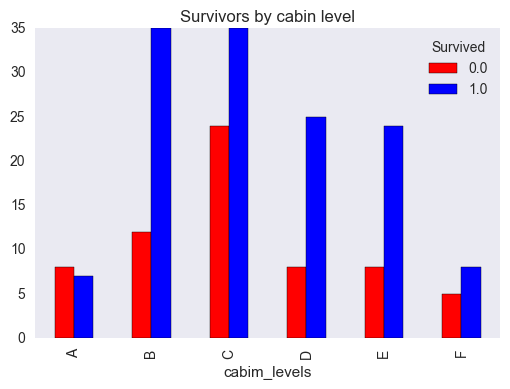

In [224]:
table_survived_Cabin_level = pd.crosstab(Titanic_df.cabim_levels,
                                    Titanic_df.Survived.loc[Titanic_df.cabim_levels != "no data"])

table_survived_Cabin_level.plot(kind='bar', 
                           stacked=False, color=['red','blue'], 
                           grid=False, title = 'Survivors by cabin level')

# os dados do andar que a cabine estava localizada nao representam os dados totais em termos de sobreviventes, pois faltam muitos dados

# Fase de Conclusão

### O estudo acima analisa os dados de 891 passageiros do Titanic, com base nesses dados podemos observar que os passageiros que estavam na classe 1 e 2 tiveram mais chance de escapar com vida tragedia, bem como mulheres e criancas. Porem os dados nao me permite informar se isso se deve ao fato de eles pertencerem a essas classes, ou a outro fator nao identificado no estudo.